Gravitational wave data analysis is complex and requires expertise in signal processing and data analysis techniques. The Python package GWpy and LIGO's data analysis tools can be helpful for studying gravitational wave signals. Here I am going to introduce you to a python package for Gravitational Waves analysis. Welcome to GWpy.

# GWpy

#### The basic idea of GWpy is to simplify all of the tedious bits of analysing data, allowing users to study and plot data quickly and effectively.

### Let's do some quick start.

## Data Structure

### 1. Time Series Data

GWpy provides the TimeSeries object as a way of representing time series data. To create a simple TimeSeries filled with random data:

In [7]:
from numpy.random import random
from gwpy.timeseries import TimeSeries

t = TimeSeries(random(1000))
print(t)

TimeSeries([0.48279548, 0.40240916, 0.88228087, ..., 0.99292877,
            0.65667814, 0.99889388]
           unit: dimensionless,
           t0: 0.0 s,
           dt: 1.0 s,
           name: None,
           channel: None)


#### Reading and Writing Time Series Data
The TimeSeries object includes read() write() method to enable reading and writing from file.

In [ ]:
data = TimeSeries.read('data-name.txt')

#### Accessing Open Data from GWOSC

The Gravitational-Wave Open Science Centre (GWOSC) provides strain data from gravitational-wave observatories for public use, including small datasets around each GW event detection, and bulk datasets covering entire observing epochs. 
https://gwosc.org/data/

### TimeSeries.fetch_open_data()

To fetch 30 seconds of strain data around the first ever gravitational-wave detection (GW150914), you need to give the prefix of the relevant observatory ('H1' for the LIGO Hanford Observatory, 'L1' for LIGO Livingston), and the start and end times of your query. We can use the gwosc Python package to query GWOSC itself for the right central GPS time:

In [10]:
from gwosc.datasets import event_gps
gps = event_gps("GW150914")
start = int(gps) - 15
end = int(gps) + 15

Then we can call TimeSeries.fetch_open_data() to download the calibrated GW strain data in that interval:

In [11]:
from gwpy.timeseries import TimeSeries
data = TimeSeries.fetch_open_data('L1',start,end)

Now we can plot the fetched data as:

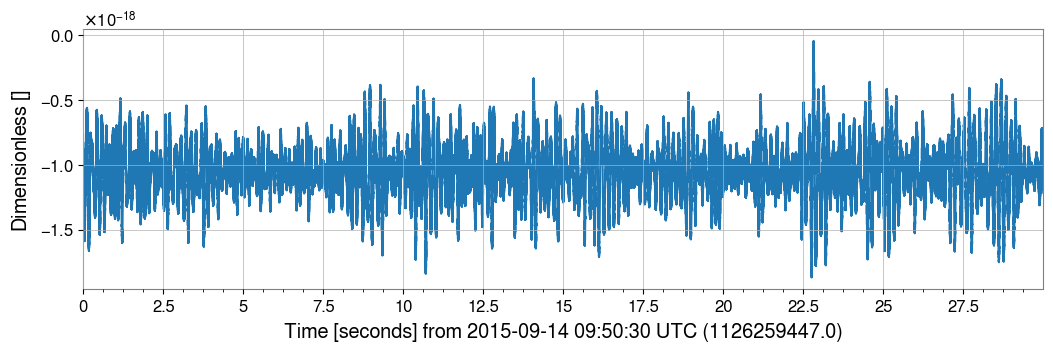

In [12]:
data.plot()

GWOSC has also published a data set containing instrumental sensor data in a three-hour window around GW170814. These data cannot be loaded using TimeSeries.fetch_open_data(), but can be loaded using TimeSeries.get() (or TimeSeriesDict.get()), by specifying host="losc-nds.ligo.org".